In [3]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger
import numpy as np
import tqdm
import seaborn as sns

In [4]:
import numba

In [29]:
prs = np.load('../data/processed/pr.npy')
# pr = np.transpose(pr, (0,2,1,3))
# pr = pr.reshape(1000,1000,40)
# pr = pr.reshape(1000000, 40)
# h_3 = np.load('../data/processed/h_3.npy')
# h_2 = np.load('../data/processed/h_2.npy')
# h_1 = np.load('../data/processed/h_1.npy')
# h_0 = np.load('../data/processed/h_0.npy')
# h_3g = np.load('../data/processed/h_3_gan.npy')
# h_2g = np.load('../data/processed/h_2_gan.npy')
# h_1g = np.load('../data/processed/h_1_gan.npy')
# h_0g = np.load('../data/processed/h_0_gan.npy')
# Z_real = np.concatenate([h_0, h_1, h_2, h_3],axis=1)
# Z_gan = np.concatenate([h_0g, h_1g, h_2g, h_3g],axis=1)

In [30]:
at = np.load('../data/processed/attribute_table.npy')
ft = np.load('../data/processed/fitness_table.npy')

In [31]:
at = np.transpose(at, (1,0,2))

In [32]:
def fitness(parents, attribute_table, fitness_table):
    '''
    We define a simple fitness metric where the percent orange
    and percent black contribute to higher fitness.
    We use a lookup table of a predefined fitness landscape (for speed).
    '''
    fitness = []
    for i in range(len(parents)):
        fitness.append(np.argmin(np.sum(np.abs(attribute_table - parents[i]),axis=1)))

    return fitness

In [ ]:
fm = []
for pr in prs:
    pr = np.transpose(pr, (1,0,2))
    parent_fitness = fitness(pr.reshape(pr.shape[0],np.prod(pr.shape[1:])),
             at.reshape(at.shape[0],np.prod(at.shape[1:])),
             ft)
    fm.append(parent_fitness)

In [ ]:
np.save('fitness_record', np.array(fm))

In [ ]:
np.exp(0)

In [3]:
Z = pr

In [4]:
tsne = TSNE(callbacks=ErrorLogger(), n_jobs=-1, learning_rate=Z.shape[0]/12, exaggeration=4)

In [5]:
embedded = tsne.fit(Z)

/home/etheredge/miniconda3/envs/36/lib/python3.6/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Iteration   50, KL divergence    nan, 50 iterations in 27.6784 sec
Iteration  100, KL divergence    nan, 50 iterations in 29.5462 sec
Iteration  150, KL divergence    nan, 50 iterations in 29.9837 sec
Iteration  200, KL divergence    nan, 50 iterations in 28.8241 sec
Iteration  250, KL divergence    nan, 50 iterations in 28.1749 sec
Iteration   50, KL divergence    nan, 50 iterations in 27.0032 sec
Iteration  100, KL divergence    nan, 50 iterations in 28.2626 sec
Iteration  150, KL divergence    nan, 50 iterations in 29.2854 sec
Iteration  200, KL divergence    nan, 50 iterations in 31.1032 sec
Iteration  250, KL divergence    nan, 50 iterations in 31.9510 sec
Iteration  300, KL divergence    nan, 50 iterations in 47.7890 sec
Iteration  350, KL divergence    nan, 50 iterations in 63.3464 sec
Iteration  400, KL divergence    nan, 50 iterations in 63.6376 sec
Iteration  450, KL divergence    nan, 50 iterations in 63.7474 sec
Iteration  500, KL divergence    nan, 50 iterations in 35.3475

In [6]:
embedding = embedded

In [5]:
# np.save('prembedding', embedding)
embedding = np.load('prembedding.npy')

In [6]:
import matplotlib.pyplot as plt

Text(4.8, 3.5, 'generation 1')

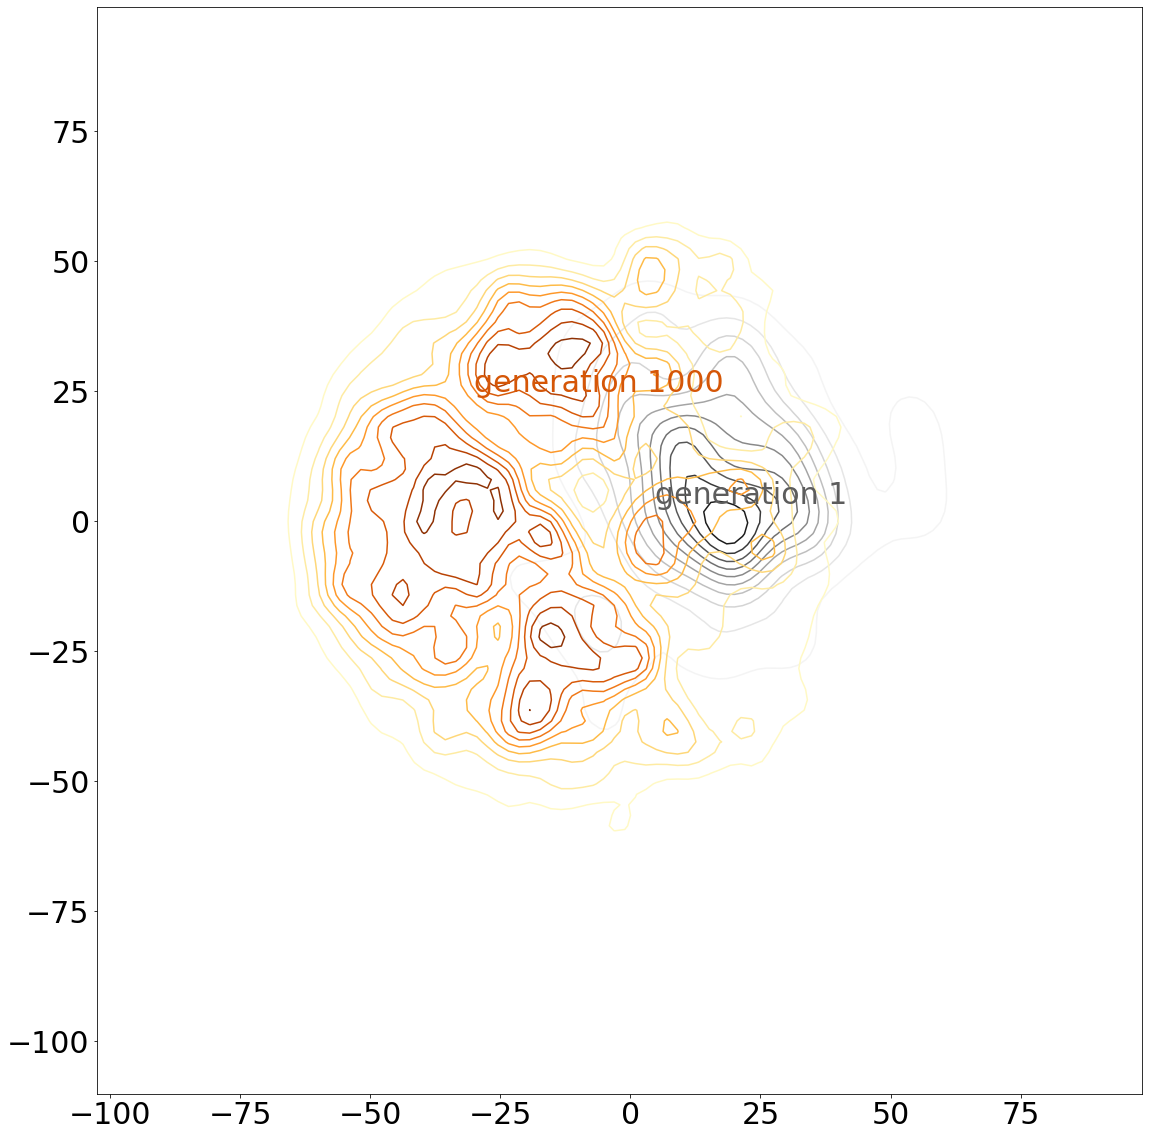

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

# Set up the figure
f, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(embedding[0:2000,0], embedding[0:2000,1],
                 cmap="Greys", shade=False, shade_lowest=False)
ax = sns.kdeplot(embedding[600000:1000000,0], embedding[600000:1000000,1],
                 cmap="YlOrBr", shade=False, shade_lowest=False)

red = sns.color_palette("Greys")[-2]
blue = sns.color_palette("YlOrBr")[-2]

ax.text(-30, 25, "generation 1000", color=blue)
ax.text(4.8, 3.5, "generation 1", color=red)

# fig = plt.gcf()
# fig.savefig('evolution.png')

In [6]:
for i in range(671,1000):
    print(i)
    strt = i * 1000
    stop = strt + 1000
    print(strt, stop)
    plt.clf()
    plt.figure(figsize=(20,20))
    strt = i*1000
    stp = strt + 1000
    h, x, y, p = plt.hist2d(
        embedding[strt:stop,0],
        embedding[strt:stop,1], 
        20,
        [[np.min(embedding[:,0]),np.max(embedding[:,0])],
         [np.min(embedding[:,1]),np.max(embedding[:,1])]],
        density=True,)
    plt.clf()
    plt.imshow(h, origin = "lower", interpolation = "gaussian")
    fig = plt.gcf()
    fig.savefig('../report/figures/images/evolve_latents/{:03d}.png'.format(i), dpi=300)
    plt.close()

671
671000 672000
672
672000 673000
673
673000 674000
674
674000 675000
675
675000 676000
676
676000 677000
677
677000 678000
678
678000 679000
679
679000 680000
680
680000 681000
681
681000 682000
682
682000 683000
683
683000 684000
684
684000 685000
685
685000 686000
686
686000 687000
687
687000 688000
688
688000 689000
689
689000 690000
690
690000 691000
691
691000 692000
692
692000 693000
693
693000 694000
694
694000 695000
695
695000 696000
696
696000 697000
697
697000 698000
698
698000 699000
699
699000 700000
700
700000 701000
701
701000 702000
702
702000 703000
703
703000 704000
704
704000 705000
705
705000 706000
706
706000 707000
707
707000 708000
708
708000 709000
709
709000 710000
710
710000 711000
711
711000 712000
712
712000 713000
713
713000 714000
714
714000 715000
715
715000 716000
716
716000 717000
717
717000 718000
718
718000 719000
719
719000 720000
720
720000 721000
721
721000 722000
722
722000 723000
723
723000 724000
724
724000 725000
725
725000 726000
726
726000

<Figure size 432x288 with 0 Axes>

In [3]:
h, x, y, p = plt.hist2d(
        embedding[strt:stop,0],
        embedding[strt:stop,1], 
        20,
        [[np.min(embedding[:,0]),np.max(embedding[:,0])],
         [np.min(embedding[:,1]),np.max(embedding[:,1])]],
        density=True,)
plt.imshow(h, origin = "lower", interpolation = "gaussian")

NameError: name 'plt' is not defined

In [7]:
import matplotlib.pyplot as plt

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-40.18025625, -38.05559665, -35.93093705, -33.80627745,
        -31.68161785, -29.55695825, -27.43229865, -25.30763905,
        -23.18297945, -21.05831985, -18.93366025, -16.80900065,
        -14.68434105, -12.55968145, -10.43502185,  -8.31036225,
         -6.18570265,  -4.06104305,  -1.93638345,   0.18827615,
          2.31293575,   4.43759534,   6.56225494,   8.68691454,
         10.81157414,  12.93623374,  15.06089334,  17.18555294,
         19.31021254,  21.43487214,  23.55953174,  25.68419134,
         27.80885094,  29.93351054,  32.05817014,  34.18282974,
         36.30748934,  38.43214894,  40.55680854,  42.68146814,
         44.80612774,  46.93078734,  49.05544694,  51.18010654,
         53.30476614,  55.42942574,  57.5540853

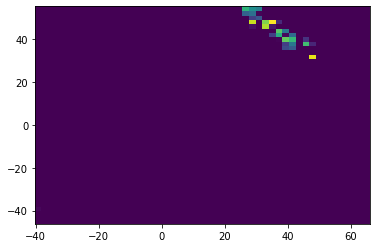

In [20]:
strt = 1000000
stop = -1
plt.hist2d(embedded[strt:stop, 0], embedded[strt:stop, 1],bins=50)